In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
type(boston)

sklearn.utils.Bunch

In [5]:
boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
boston['data']
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [10]:
bostonDF = pd.DataFrame(boston.data,columns=boston.feature_names)
bostonDF.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [11]:
bostonDF['PRICE'] = boston.target

In [12]:
bostonDF.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [13]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

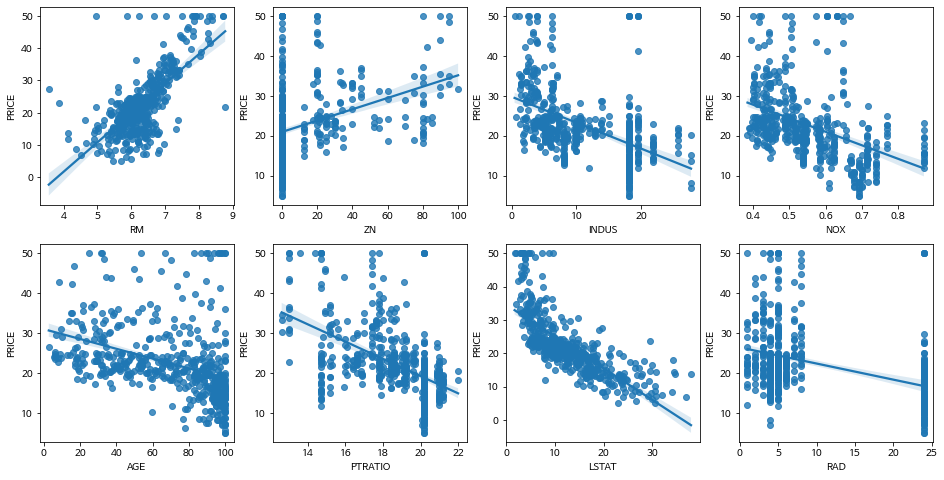

In [17]:
fig, axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature,y='PRICE',data=bostonDF, ax=axs[row][col])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [20]:
y = bostonDF.PRICE
X = bostonDF.drop(columns=['PRICE'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=156)
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,pred)
mse,rmse,r2

(17.29691590790215, 4.158956107955715, 0.7572263323138921)

In [21]:
lr.intercept_

40.995595172164336

In [26]:
np.round(lr.coef_,1)

array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
        -0. ,  -0.9,   0. ,  -0.6])

In [29]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=X.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [30]:
from sklearn.model_selection import cross_val_score

In [33]:
y = bostonDF.PRICE
X = bostonDF.drop(columns=['PRICE'])
lr = LinearRegression()
neg_mse_scores = cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores) 
avg_rmse = np.mean(rmse_scores)
np.round(neg_mse_scores,2),np.round(rms_scores,2),np.round(avg_rmse,3)

(array([-12.46, -26.05, -33.07, -80.76, -33.31]),
 array([3.53, 5.1 , 5.75, 8.99, 5.77]),
 5.829)

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
X=np.arange(4).reshape(2,2)
X

array([[0, 1],
       [2, 3]])

In [37]:
poly = PolynomialFeatures(degree=3)
poly_ftr = poly.fit_transform(X)
poly_ftr

array([[ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In [38]:
def polynomial_func(X):
    y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

In [39]:
X = np.arange(4).reshape(2,2)
X

array([[0, 1],
       [2, 3]])

In [40]:
y = polynomial_func(X)
y

array([  5, 125])

In [41]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
poly_ftr

array([[ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In [42]:
model = LinearRegression()
model.fit(poly_ftr,y)

LinearRegression()

In [43]:
np.round(model.coef_,2)

array([0.  , 0.18, 0.18, 0.36, 0.54, 0.72, 0.72, 1.08, 1.62, 2.34])

In [44]:
model.coef_.shape

(10,)

## p314 과적합

In [46]:
from sklearn.pipeline import Pipeline

In [47]:
def true_fun(X):
    return np.cos(1.5*np.pi*X)

In [48]:
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
X

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
       0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
       0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834])

In [49]:
np.random.randn(n_samples)

array([ 0.8644362 , -0.74216502,  2.26975462, -1.45436567,  0.04575852,
       -0.18718385,  1.53277921,  1.46935877,  0.15494743,  0.37816252,
       -0.88778575, -1.98079647, -0.34791215,  0.15634897,  1.23029068,
        1.20237985, -0.38732682, -0.30230275, -1.04855297, -1.42001794,
       -1.70627019,  1.9507754 , -0.50965218, -0.4380743 , -1.25279536,
        0.77749036, -1.61389785, -0.21274028, -0.89546656,  0.3869025 ])

In [53]:
y = true_fun(X)+np.random.randn(n_samples)*0.1
y

array([ 1.18647108,  0.91769229,  0.99713226,  0.94338228,  0.7648706 ,
       -0.17253312, -0.28171788, -0.37525199, -0.58169922, -0.53801171,
       -0.64339733, -0.86600389, -0.85475827, -0.8932208 , -0.70900919,
       -0.88777034, -0.9513218 , -1.07220437, -0.92004658, -0.93256435,
       -0.85628691, -0.89490137, -0.74369797, -0.65182116, -0.59578829,
       -0.44858331, -0.45278403, -0.4069229 , -0.12646045, -0.08392094])

1 회귀계수:[-1.61]
1 mse:-0.3943247100869504
4 회귀계수:[ -0.51 -15.44  22.03  -7.19]
4 mse:-0.0073568531288605975
15 회귀계수:[-3.65780000e+02  1.21813400e+04 -2.19009360e+05  2.47139690e+06
 -1.88209262e+07  1.00305373e+08 -3.82338724e+08  1.05673642e+09
 -2.13165943e+09  3.13337393e+09 -3.31626879e+09  2.45971102e+09
 -1.21279587e+09  3.56926190e+08 -4.74333936e+07]
15 mse:-904771037.5509729


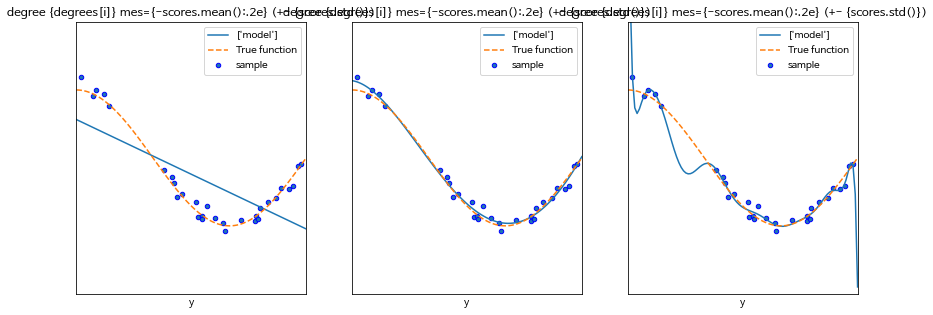

In [60]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]
for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees),i+1)
    plt.setp(ax,xticks=(),yticks=())
    polynomial_features = PolynomialFeatures(degree = degrees[i],include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('poly',polynomial_features),
                         ('linear',linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)
    scores = cross_val_score(pipeline,
                              X.reshape(-1,1),
                              y,
                              scoring = 'neg_mean_squared_error',
                              cv=10)
    coefficients = pipeline.named_steps['linear'].coef_
    print(f'{degrees[i]} 회귀계수:{np.round(coefficients,2)}')
    print(f'{degrees[i]} mse:{np.mean(scores)}')
    X_test = np.linspace(0,1,100)
    plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label = ['model'])                  
    plt.plot(X_test,true_fun(X_test),'--',label='True function')
    plt.scatter(X,y,edgecolor='b',s=20,label='sample')
    plt.xlabel('x')
    plt.xlabel('y')
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc='best')
    plt.title('degree {degrees[i]} mes={-scores.mean():.2e} (+- {scores.std()})')
plt.show()